# Workload analysis for the period 2016-2021
### Load data from ORMIS database and clean data

In [1]:
library(dplyr)
library(ggplot2)
library(tidyquant)

source('https://raw.githubusercontent.com/vxoli/R/master/Load%20%26%20Combine.r')
setwd('~/Downloads/data')
data <- CombineAll()
data$date = as.character(data$Operation.Date)
data$date = as.Date(data$Operation.Date,format = "%d-%b-%Y")
data$Month_Yr <- format(as.Date(data$date), "%Y-%m")

cts <- filter(data, data$Specialty.Desc == "CARDIO-THORACIC SURGERY")
cases <- cts %>% count(cts$Anaes.1.Name, cts$Month_Yr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lubridate


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: PerformanceAnalytics

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘xts’


The following objects are masked from ‘package:dplyr’:

    first, last



Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend


Loading required package: quantmod

Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

══ Need to Learn tidyquant? 

### Calculate the total number of CTS cases per month to see trend.

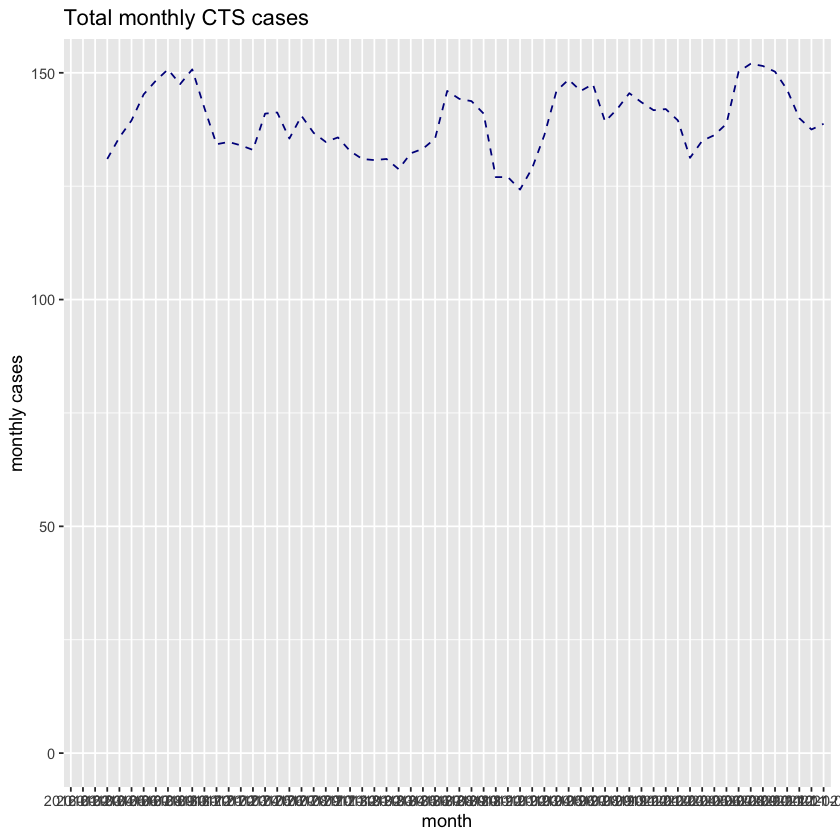

In [2]:
cts %>% count(cts$Specialty.Desc, cts$Month_Yr) %>% 
    ggplot(.,aes(x=.[,2], y=.[,3], group = 1)) + 
    geom_ma(ma_fun = SMA, n=4) + 
    labs(x="month", y="monthly cases", title="Total monthly CTS cases") + 
    coord_cartesian(ylim = c(0, 150))

The total number of CTS cases remains fairly constant, fluctuating between 135 and 160 cases per month.
(Min 131, Mean 139, Max 170)

### Calulate and plot charts for individual anaesthetists
Only full time staff and VMO's who havent changed hours in last 5 years used, 
to avoid complications of adjusting for FTE's.

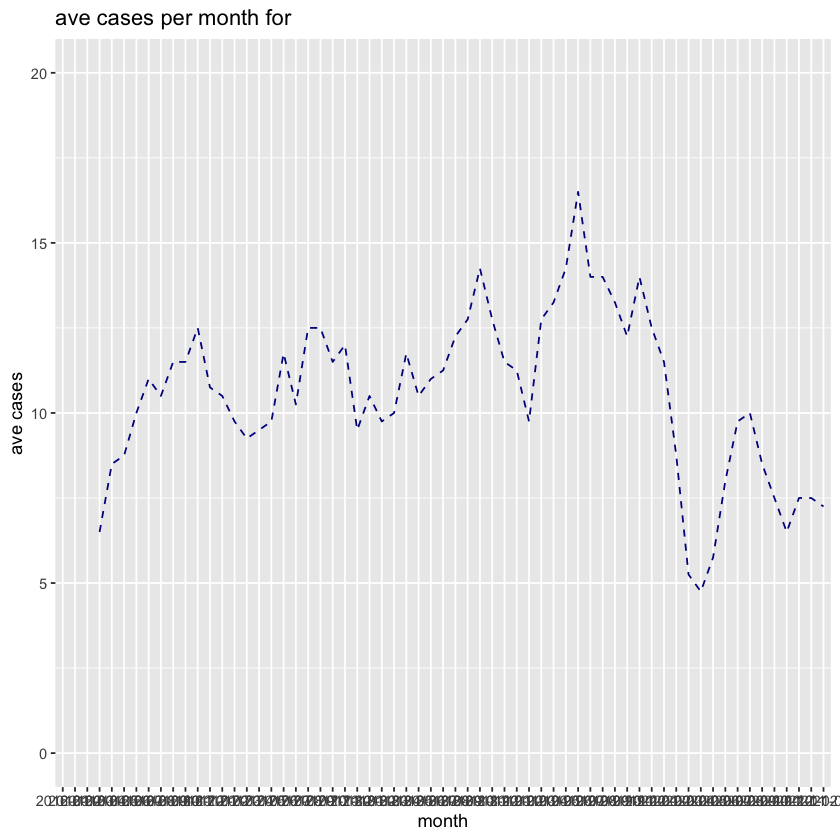

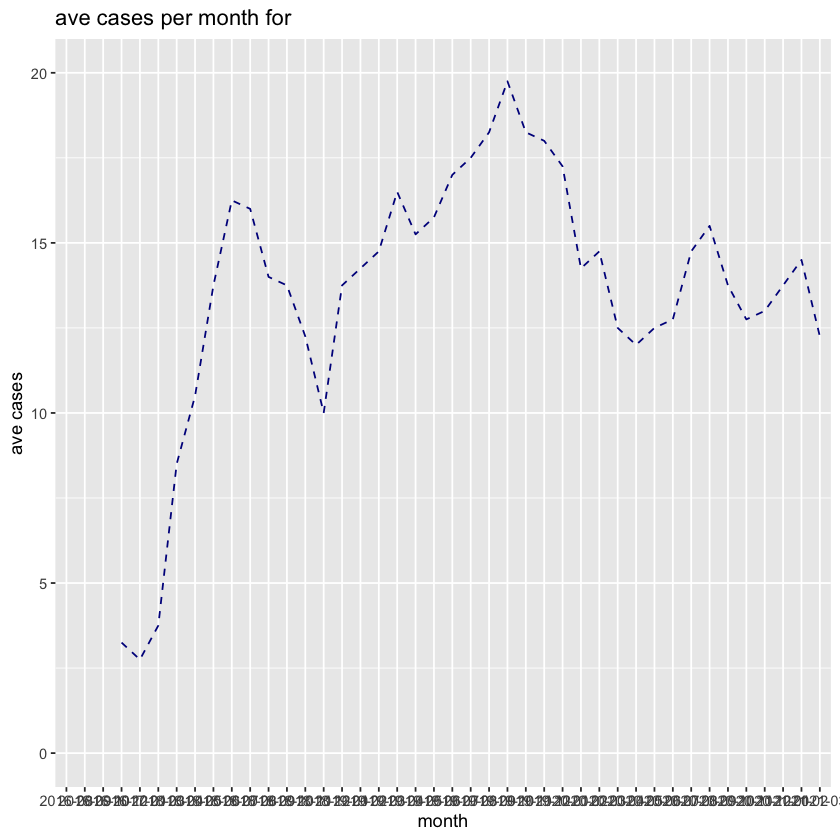

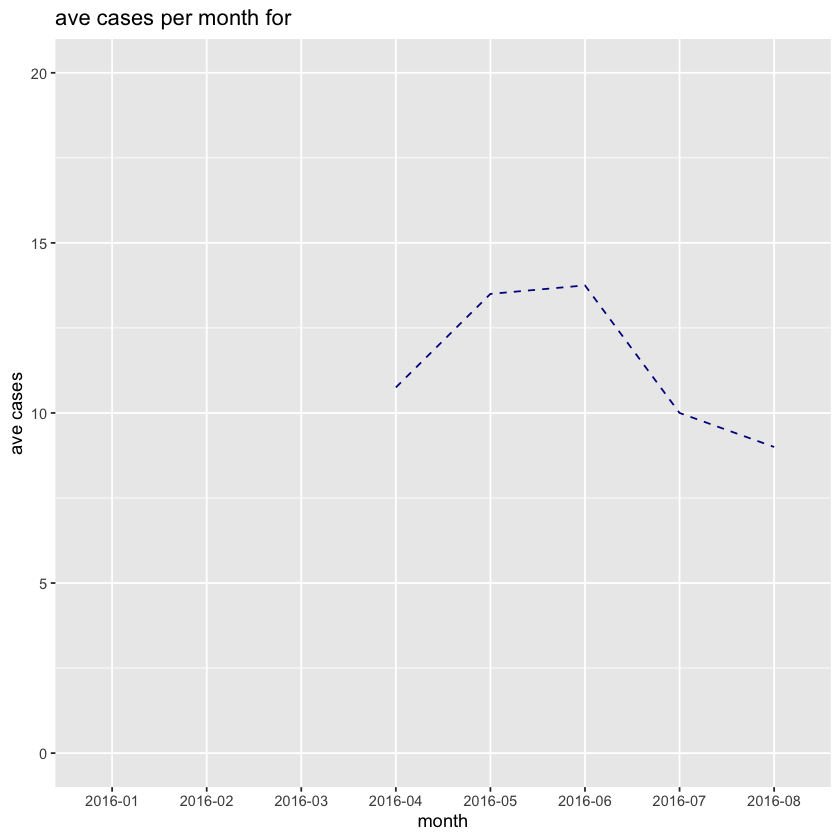

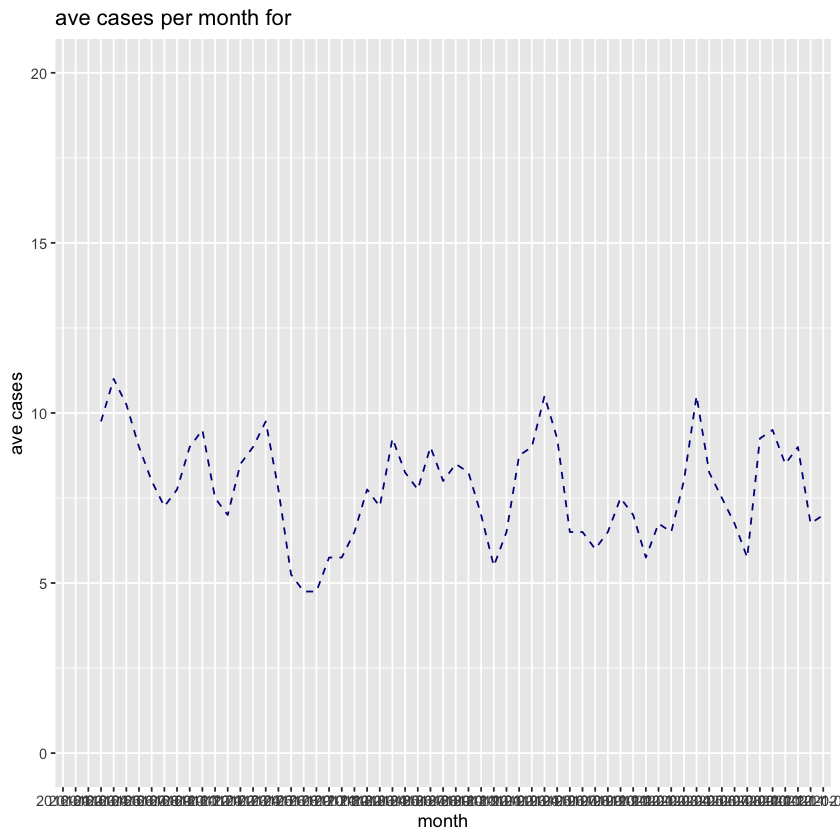

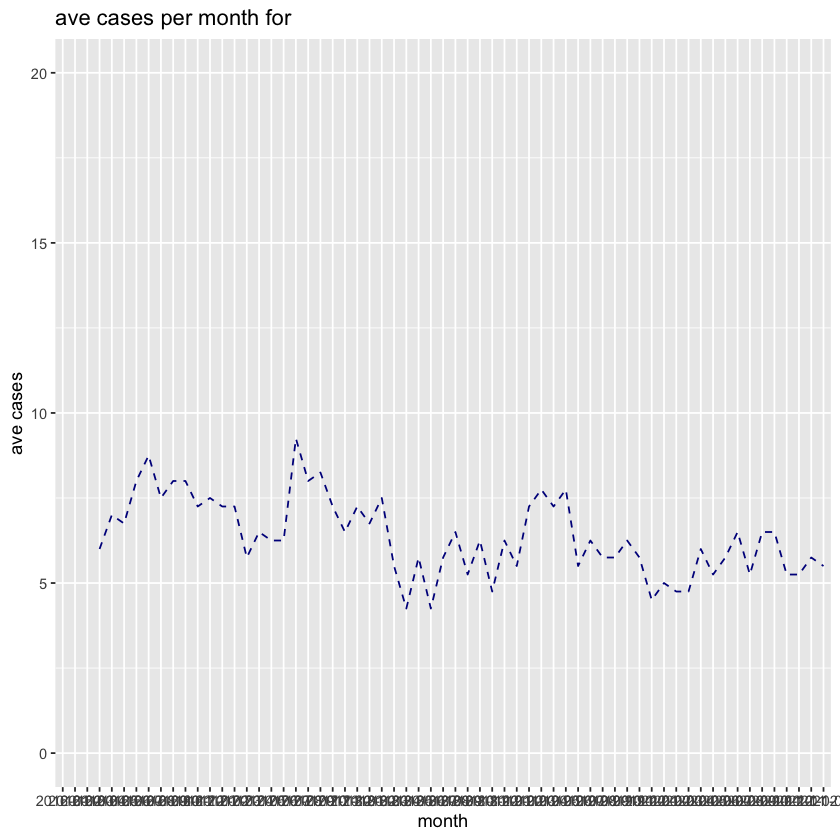

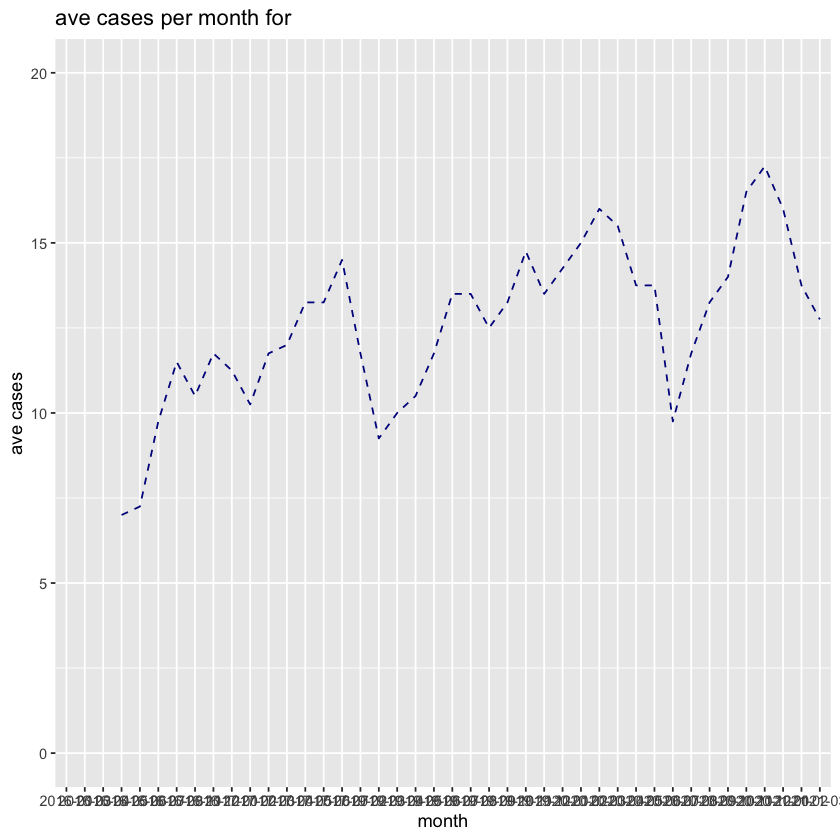

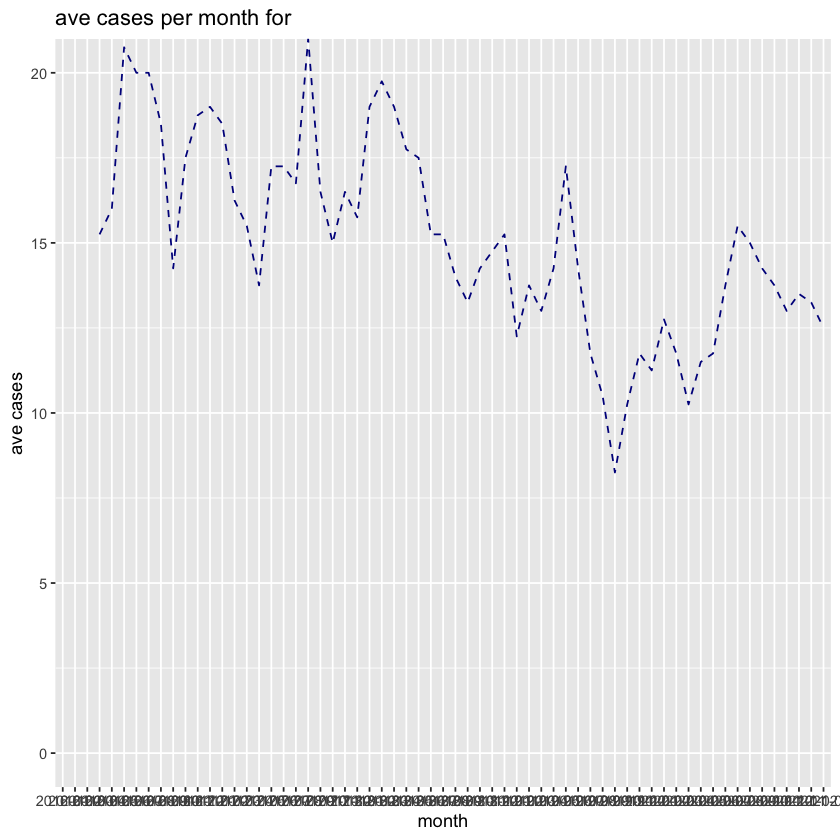

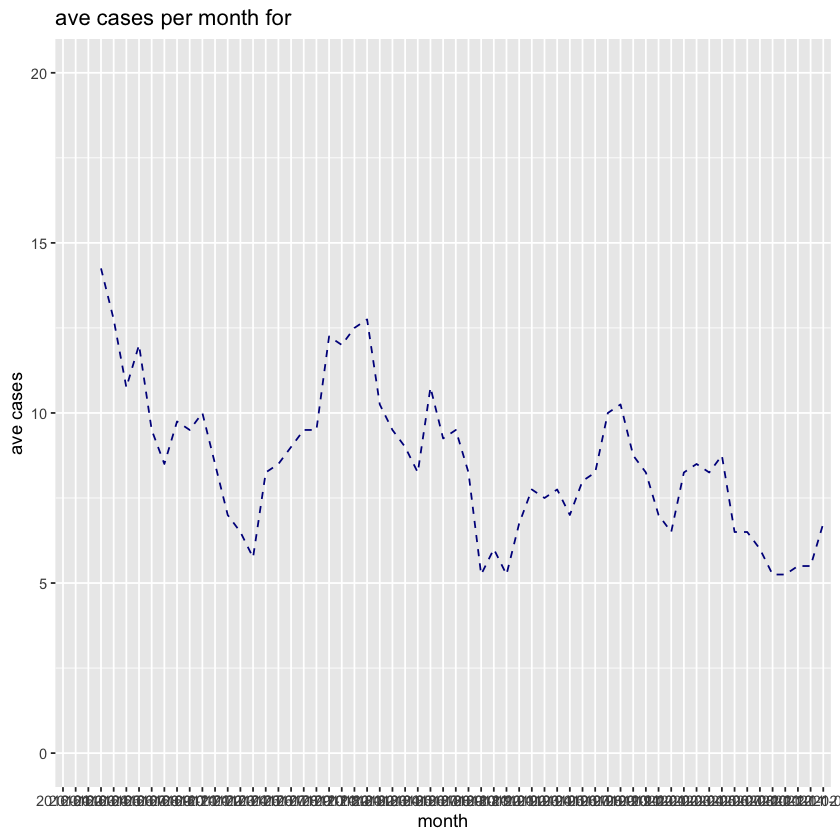

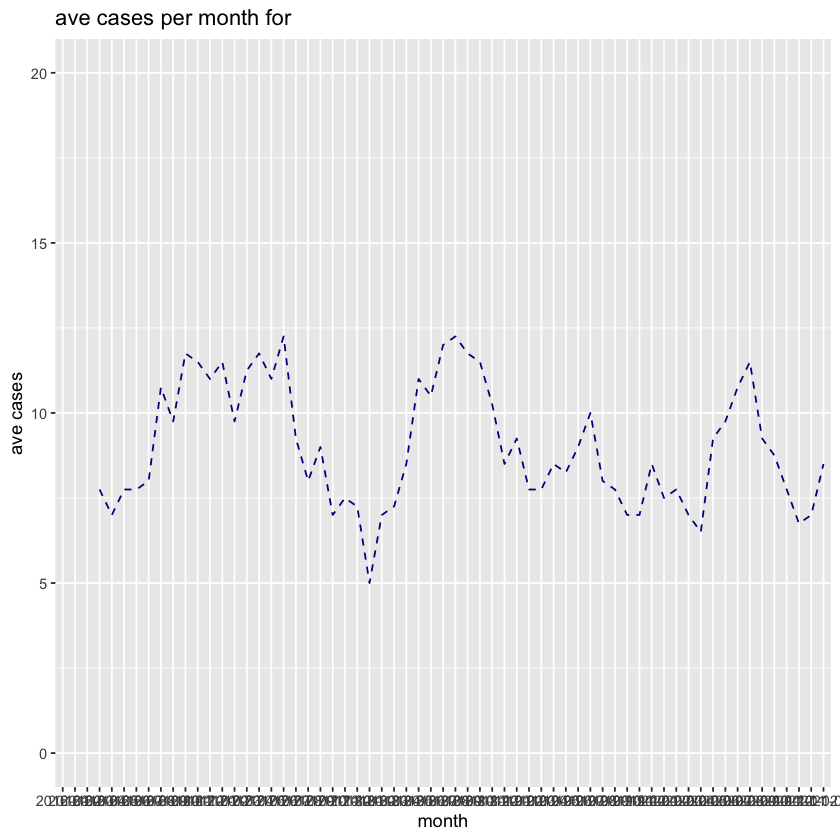

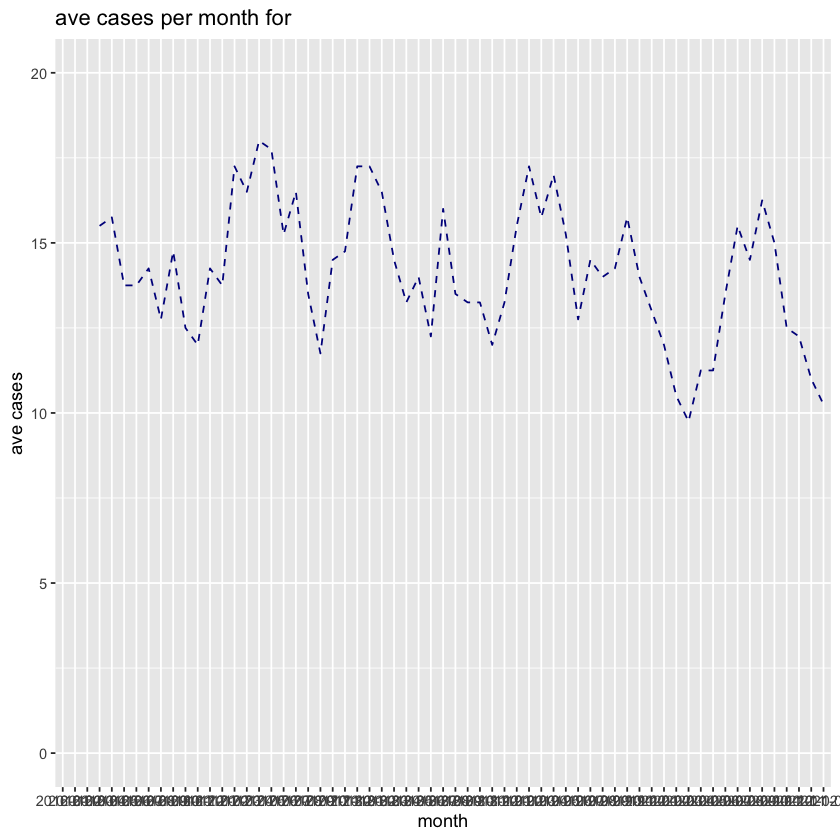

In [3]:
names <- c("STONELL,Christopher", "BEUTH,Jodie", "COLLARD,Caroline", "CORNELISSEN,Heinrich", "HOWARTH,Adam", "KUNJU,Shakeel", "MARGALE,Swaroop", "NATANI,Sarvesh", "RAPCHUK,Ivan", "SMITH,Ian")
for (name in names) {
print(
    filter(cases, cases[1] == name) %>% 
    ggplot(.,aes(x=.[,2], y=.[,3], group = 1)) + 
    geom_ma(ma_fun = SMA, n=4) + 
    labs(x="month", y="ave cases", title="ave cases per month for ") + 
    coord_cartesian(ylim = c(0, 20))    )
}


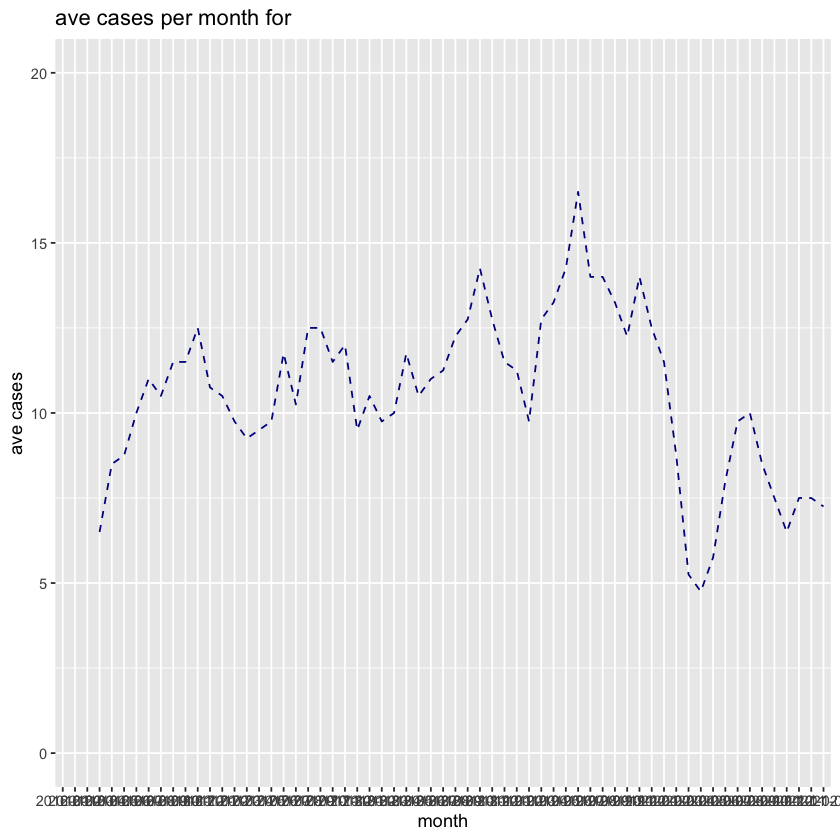

In [4]:
filter(cases, cases[1] == "STONELL,Christopher") %>% 
    ggplot(.,aes(x=.[,2], y=.[,3], group = 1)) + 
    geom_ma(ma_fun = SMA, n=4) + 
    labs(x="month", y="ave cases", title="ave cases per month for ") + 
    coord_cartesian(ylim = c(0, 20))    
